In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

In [3]:
boston = pd.read_csv('../datasets/Boston.csv', index_col='Unnamed: 0')
y = boston['crim']
boston.drop(['crim'], axis=1, inplace=True)
boston.head()

,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
1,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
2,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
3,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
4,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
5,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [24]:
not_signif = []
all_params_single = {}
for p in boston.columns:
    print('Column:', p)
    X = pd.DataFrame({
        'intercept': np.ones(boston.shape[0]),
        p: boston[p]
    })
    model = sm.OLS(y, X)
    results = model.fit()

    if results.pvalues[p] > 0.05:
        not_signif.append(p)
    
    all_params_single[p] = results.params[p]
    print('r squared:', results.rsquared)
    print('p-value coeff:', results.pvalues[p])
    print('param (slope):', results.params[p])
    print()

print('Columns with p-values > 0.05:', not_signif)

Column: zn
r squared: 0.04018790803211081
p-value coeff: 5.50647210767904e-06
param (slope): -0.07393497740412368

Column: indus
r squared: 0.16531007043075163
p-value coeff: 1.4503489330272292e-21
param (slope): 0.5097763311042306

Column: chas
r squared: 0.0031238689633057426
p-value coeff: 0.20943450153520113
param (slope): -1.892776550803758

Column: nox
r squared: 0.17721718179269363
p-value coeff: 3.751739260356816e-23
param (slope): 31.248531201122923

Column: rm
r squared: 0.04806911671608338
p-value coeff: 6.346702984687886e-07
param (slope): -2.684051224113948

Column: age
r squared: 0.12442145175894648
p-value coeff: 2.8548693502441573e-16
param (slope): 0.1077862271395331

Column: dis
r squared: 0.1441493749253987
p-value coeff: 8.519948766926204e-19
param (slope): -1.5509016824100994

Column: rad
r squared: 0.39125668674998904
p-value coeff: 2.6938443981856735e-56
param (slope): 0.6179109273272014

Column: tax
r squared: 0.3396142433788123
p-value coeff: 2.357126835257048e

In [25]:
# Using all predictors
X = boston.copy()
X['intercept'] = np.ones(boston.shape[0])
model = sm.OLS(y, X)
results = model.fit()
all_params_multiple = results.params

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     33.52
Date:                Tue, 26 Dec 2023   Prob (F-statistic):           2.03e-56
Time:                        20:11:57   Log-Likelihood:                -1655.4
No. Observations:                 506   AIC:                             3337.
Df Residuals:                     493   BIC:                             3392.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
zn             0.0457      0.019      2.433      0.015       0.009       0.083
indus         -0.0584      0.084     -0.698      0.486      -0.223       0.106
chas          -0.8254      1.183     -0.697      0.486      -3.150       1.500
nox           -9.9576      5.290     -1.882      0.060     -20.351       0.436
rm             0.6289      0.607      1.036      0.301      -0.564       1.822
age           -0.0008      0.018     -0.047      0.962      -0.036       0.034
dis           -1.0122      0.282     -3.584      0.000      -1.567      -0.457
rad            0.6125      0.088      6.997      0.000       0.440       0.784
tax           -0.0038      0.005     -0.730      0.466      -0.014       0.006
ptratio       -0.3041      0.186     -1.632      0.103      -0.670       0.062
lstat          0.1388      0.076      1.833      0.067      -0.010       0.288
medv          -0.2201      0.060     -3.678      0.000      -0.338      -0.103
intercept     13.7784      7.082      1.946      0.052      -0.136      27.693
==============================================================================
Omnibus:                      663.436   Durbin-Watson:                   1.516
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            80856.852
Skew:                           6.579   Prob(JB):                         0.00
Kurtosis:                      63.514   Cond. No.                     1.24e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
# We can reject the null hypotheses that all predictors are zero for:
# zn, dis, rad, medv

Predictor | Univariate Coef | Multiple Regression Coef
zn            -0.0739               0.0457
indus          0.5098              -0.0584
chas          -1.8928              -0.8254
nox           31.2485              -9.9576
rm            -2.6841               0.6289
age            0.1078              -0.0008
dis           -1.5509              -1.0122
rad            0.6179               0.6125
tax            0.0297              -0.0038
ptratio         1.152              -0.3041
lstat          0.5488               0.1388
medv          -0.3632              -0.2201


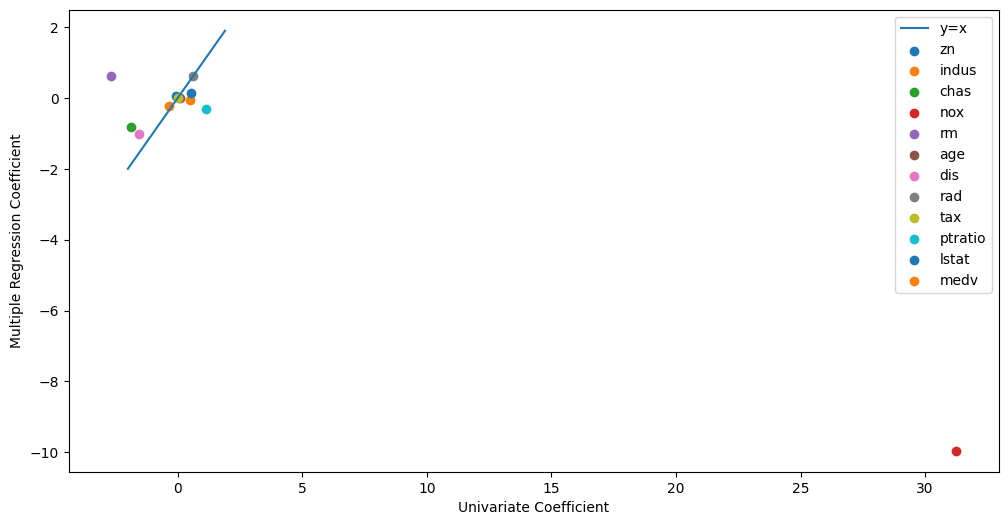

In [56]:
print('Predictor | Univariate Coef | Multiple Regression Coef')
plt.figure(figsize=(12,6))
plt.plot(np.arange(-2,2,0.1), np.arange(-2,2,0.1), label='y=x')
for p in all_params_single.keys():
    plt.scatter(all_params_single[p], all_params_multiple[p], label=p)
    print(p.ljust(10), str(round(all_params_single[p], 4)).rjust(10), str(round(all_params_multiple[p], 4)).rjust(20))

plt.xlabel('Univariate Coefficient');
plt.ylabel('Multiple Regression Coefficient');
plt.legend();

In [ ]:
# Non linear model
